<a href="https://colab.research.google.com/github/bot9066/APA/blob/main/Amazon_Prime_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Amazone Prime data analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

This project focuses on performing an in-depth Exploratory Data Analysis (EDA) on the vast catalog of TV shows and movies available on Amazon Prime Video in the United States.
Leveraging two structured datasets—
titles.csv, which includes metadata such as title type (TV show or movie), release year, runtime, genres, and IMDb ratings, and
credits.csv, which details cast and crew information—the goal of this analysis is to uncover meaningful patterns, trends, and insights that highlight how content is distributed and consumed on the platform.
The analysis began with thorough data cleaning, including removing duplicates, handling missing values, and properly parsing list-like fields such as genres and production countries. From there, we explored the overall distribution of content types and discovered that movies significantly outnumber TV shows on the platform. Genre analysis revealed Drama, Comedy, and Action as the most frequently occurring genres across both formats, suggesting viewer preference and platform focus. We also analyzed release trends over time and observed a steady rise in content production and acquisition, particularly after 2010, reflecting Amazon’s growing investment in original programming and global licensing. When examining IMDb ratings, we found that most content scores fall within the 5 to 8 range, with relatively few extremely high- or low-rated entries. Runtime analysis showed that movies typically cluster around 90 to 120 minutes, while TV shows vary more significantly, often depending on the number of seasons. The cast and crew dataset was used to identify the most frequently appearing actors and directors, giving insight into recurring talent and perhaps content that resonates more with audiences. By combining all these findings, this project offers a data-driven understanding of the type of content Amazon Prime prioritizes, how it has evolved over time, and which attributes might influence popularity or viewer engagement. These insights can be valuable not only for viewers or data enthusiasts, but also for content strategists and business teams at Amazon seeking to align their offerings with audience demand and market trends. Ultimately, this analysis demonstrates the power of exploratory data work in drawing actionable insights from a streaming service's content library.

# **GitHub Link -**

https://github.com/bot9066/APA/tree/main

# **1 Problem Statement**


Amazon Prime Video offers thousands of movies and TV shows across various genres, countries, and formats, but there's limited visibility into how this content is distributed and consumed.

Without structured analysis, it’s challenging to understand what types of content dominate the platform (e.g., genres, ratings, content types).

There’s a need to explore how the platform’s content offering has evolved over time — in terms of volume, diversity, and quality (as rated by viewers).

Stakeholders like content strategists, data analysts, and marketers need insights to guide future content acquisition and production decisions.

Key questions remain unanswered, such as:

What is the balance between TV shows and movies?

Which genres are most common and potentially overrepresented?

Are there patterns in IMDb ratings or runtime that influence content performance?

Which actors or directors are most frequently featured?

How has content release frequency changed over the years?

By answering these questions through data analysis, Amazon can better align its offerings with viewer preferences and market trends.



# **2 Define Your Business Objective?**

To gain a comprehensive understanding of the type, quality, and volume of content available on Amazon Prime Video in order to support data-driven content strategy decisions.

To identify the most prevalent and popular genres, content types (TV shows vs. movies), and production trends that define Prime Video’s catalog.

To uncover audience preferences based on patterns in IMDb ratings, runtime distributions, and genre frequency.

To analyze temporal trends in content releases and assess how Amazon’s content offering has evolved over time.

To evaluate which actors and directors appear most frequently, offering insights into talent that may resonate more with Prime subscribers.

To use visual storytelling and descriptive statistics to present insights that help decision-makers optimize future content acquisitions, investments, and recommendation systems.

Ultimately, to transform raw content data into actionable insights that align Prime Video’s offerings with viewer demand, improve platform engagement, and support long-term strategic growth.

# **3 Working on Data set** : -  

### Import Libraries

In [67]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# Set seaborn styling
sns.set(style='whitegrid')
print("✅ Libraries imported successfully.")


✅ Libraries imported successfully.


### Dataset Loading

In [68]:
# ✅ Load the Datasets from GitHub (or local if needed)
try:
    titles_df = pd.read_csv("https://raw.githubusercontent.com/bot9066/APA/main/titles.csv")
    credits_df = pd.read_csv("https://raw.githubusercontent.com/bot9066/APA/main/credits.csv")
    print(f" Data loaded successfully.\nTitles shape: {titles_df.shape}\nCredits shape: {credits_df.shape}")
except Exception as e:
    print(" Error loading datasets:", e)


 Data loaded successfully.
Titles shape: (9871, 15)
Credits shape: (124235, 5)


### Dataset First View

In [69]:
# First View of Datasets
print(" Titles Dataset:")
display(titles_df.head())

print(" Credits Dataset:")
display(credits_df.head())


 Titles Dataset:


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


 Credits Dataset:


,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


### Dataset Rows & Columns count

In [70]:
# Dataset Shape (Rows & Columns Count)
print(f"Titles Dataset -> Rows: {titles_df.shape[0]}, Columns: {titles_df.shape[1]}")
print(f"Credits Dataset -> Rows: {credits_df.shape[0]}, Columns: {credits_df.shape[1]}")


Titles Dataset -> Rows: 9871, Columns: 15
Credits Dataset -> Rows: 124235, Columns: 5


### Dataset Information

In [71]:
#  Dataset Information (Data Types and Non-Null Counts)
print(" Titles Dataset Info:")
titles_df.info()

print("\n Credits Dataset Info:")
credits_df.info()


 Titles Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtyp

### Duplicate Values

In [72]:
# ✅ Duplicate Value Count and Display

# Count duplicates
duplicate_titles = titles_df[titles_df.duplicated()]
duplicate_credits = credits_df[credits_df.duplicated()]

# Print duplicate counts
print(" Duplicate Rows in Titles Dataset:", duplicate_titles.shape[0])
print(" Duplicate Rows in Credits Dataset:", duplicate_credits.shape[0])

# Display duplicate rows if any
if not duplicate_titles.empty:
    print("\n Duplicate Entries in Titles Dataset:")
    display(duplicate_titles)
else:
    print("\n No duplicate entries found in Titles Dataset.")

if not duplicate_credits.empty:
    print("\n Duplicate Entries in Credits Dataset:")
    display(duplicate_credits)
else:
    print("\n No duplicate entries found in Credits Dataset.")


 Duplicate Rows in Titles Dataset: 3
 Duplicate Rows in Credits Dataset: 56

 Duplicate Entries in Titles Dataset:


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
480,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0
720,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,1949,NaN,68,"['drama', 'crime']",['US'],NaN,tt0039343,5.0,24.0,0.841,NaN
722,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"['drama', 'romance']",['US'],NaN,tt0023849,5.8,74.0,0.600,NaN



 Duplicate Entries in Credits Dataset:


,person_id,id,name,character,role
9156,130904,tm89134,Buck Jones,Buck Roberts,ACTOR
9157,36589,tm89134,Tim McCoy,Marshal McCall,ACTOR
9158,130905,tm89134,Raymond Hatton,Sandy,ACTOR
9159,132916,tm89134,Christine McIntyre,Alice Borden,ACTOR
9160,132381,tm89134,Dave O'Brien,Joe Martin,ACTOR
9161,138410,tm89134,Robert Frazer,Wyatt,ACTOR
9162,74813,tm89134,Charles King,Steve Dunn,ACTOR
9163,27218,tm89134,Lynton Brent,Red,ACTOR
9164,27351,tm89134,Max Waizmann,Sheriff Cox,ACTOR
9165,153737,tm89134,Gene Alsace,Henchman,ACTOR


### Missing Values/Null Values

In [73]:
# Missing/Null Values Count
print("Null Values in Titles Dataset:\n", titles_df.isnull().sum())
print("\nNull Values in Credits Dataset:\n", credits_df.isnull().sum())


Null Values in Titles Dataset:
 id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

Null Values in Credits Dataset:
 person_id        0
id               0
name             0
character    16287
role             0
dtype: int64


###  Visualizing the missing values in titles_df

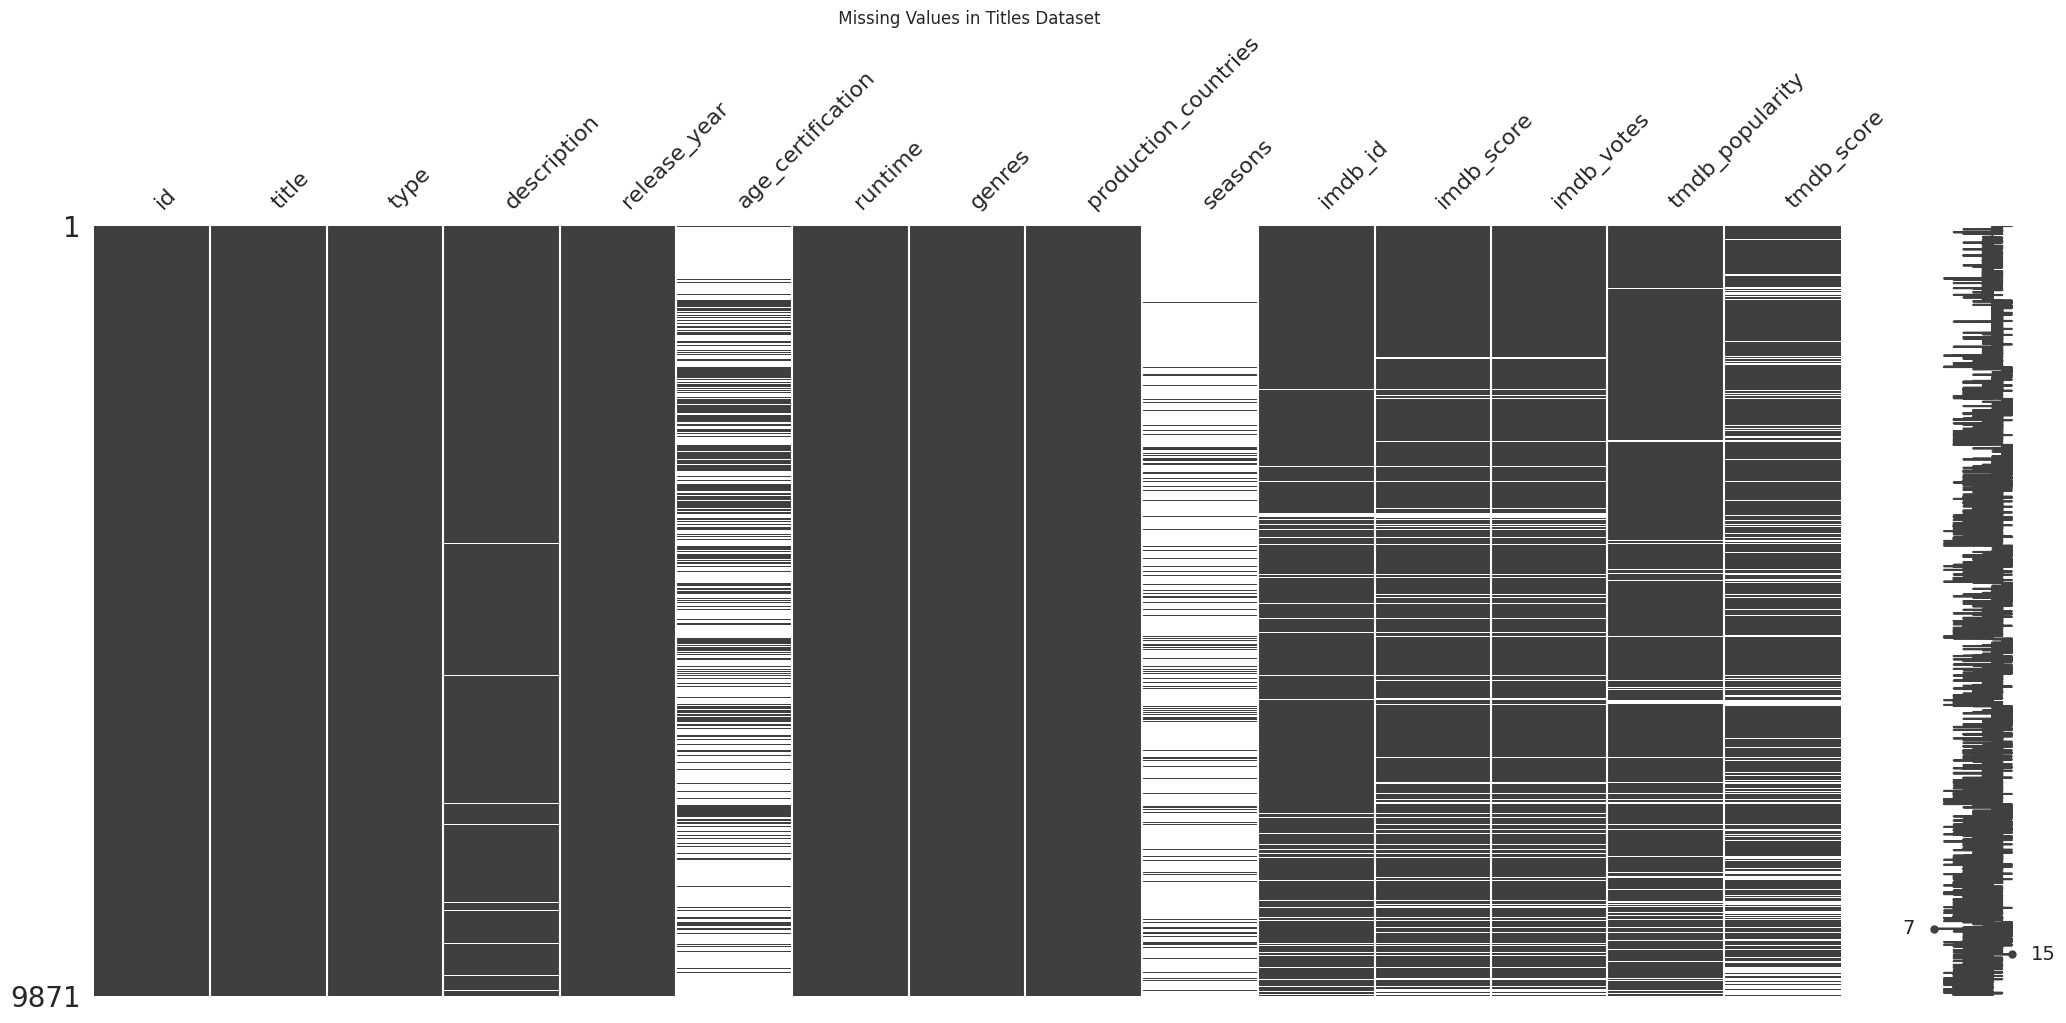

In [74]:
# Visualizing Missing Values in Titles Dataset
msno.matrix(titles_df)
plt.title(" Missing Values in Titles Dataset")
plt.show()


### Visualizing the missing values in credits_df

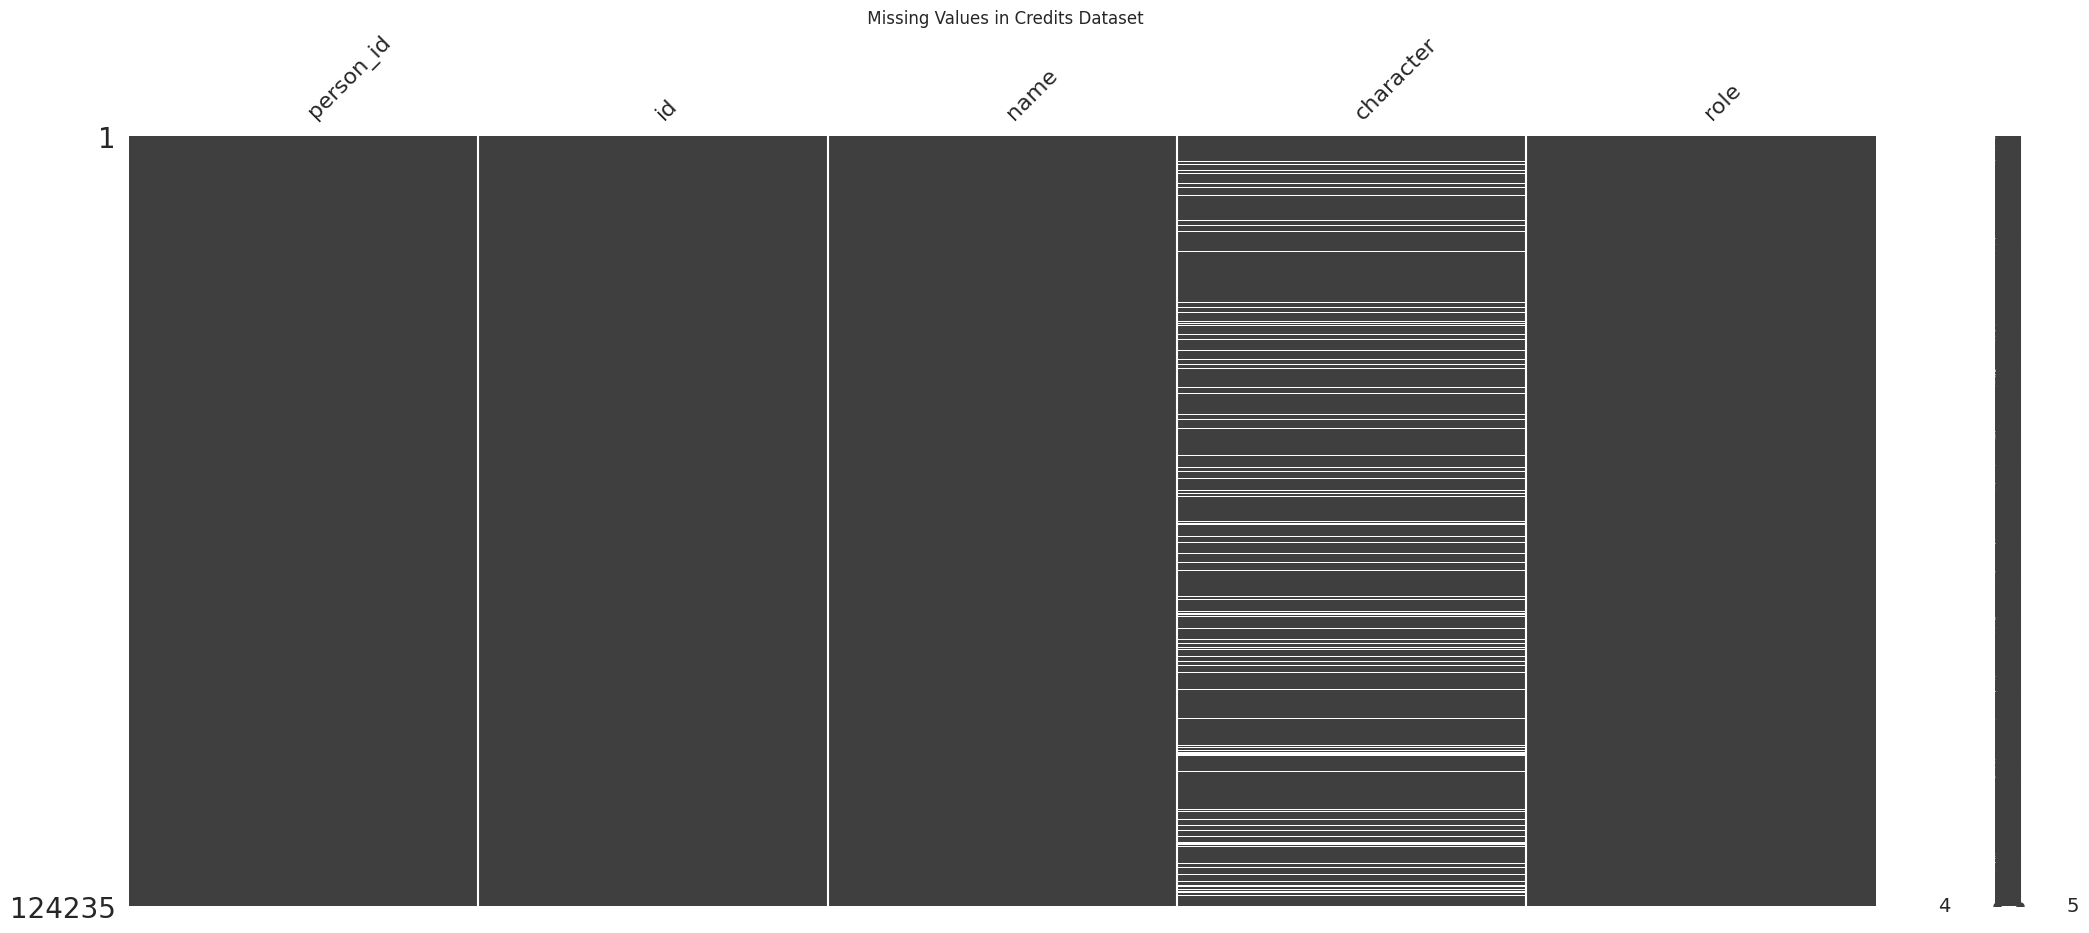

In [75]:
# Visualizing Missing Values in Credits Dataset
msno.matrix(credits_df)
plt.title(" Missing Values in Credits Dataset")
plt.show()


# **3.1 Understanding the Variables**

### List All Columns with Data Types

In [76]:
# Display columns and data types
print(" Titles Dataset Columns & Types:")
print(titles_df.dtypes)

print("\n Credits Dataset Columns & Types:")
print(credits_df.dtypes)


 Titles Dataset Columns & Types:
id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

 Credits Dataset Columns & Types:
person_id     int64
id           object
name         object
character    object
role         object
dtype: object


###  Check Number of Unique Values per Column

In [77]:
# Unique value count
print(" Unique values in Titles Dataset:")
print(titles_df.nunique())

print("\n Unique values in Credits Dataset:")
print(credits_df.nunique())


 Unique values in Titles Dataset:
id                      9868
title                   9737
type                       2
description             9734
release_year             110
age_certification         11
runtime                  207
genres                  2028
production_countries     497
seasons                   32
imdb_id                 9201
imdb_score                86
imdb_votes              3650
tmdb_popularity         5325
tmdb_score                89
dtype: int64

 Unique values in Credits Dataset:
person_id    80508
id            8861
name         79758
character    71097
role             2
dtype: int64


### Detailed Summary of Important Columns

In [78]:
# Summary explanation of each key variable
print("""
 titles_df:
- id: Unique identifier for each content item.
- title: Name of the movie or show.
- type: Content type (MOVIE or SHOW).
- release_year: Year the content was released.
- age_certification: Content rating (PG, R, etc.).
- runtime: Duration of the content in minutes.
- genres: List of genres.
- production_countries: Countries of production.
- imdb_score: IMDb rating (0–10).
- tmdb_score: TMDB rating (0–10).

 credits_df:
- id: Foreign key matching title ID from titles_df.
- name: Name of the actor or director.
- role: ACTOR or DIRECTOR.
""")



 titles_df:
- id: Unique identifier for each content item.
- title: Name of the movie or show.
- type: Content type (MOVIE or SHOW).
- release_year: Year the content was released.
- age_certification: Content rating (PG, R, etc.).
- runtime: Duration of the content in minutes.
- genres: List of genres.
- production_countries: Countries of production.
- imdb_score: IMDb rating (0–10).
- tmdb_score: TMDB rating (0–10).

 credits_df:
- id: Foreign key matching title ID from titles_df.
- name: Name of the actor or director.
- role: ACTOR or DIRECTOR.



### Value Counts for Categorical Variables

In [79]:
# Explore distribution of categories
print(" Content Types:")
print(titles_df['type'].value_counts())

print("\n Roles in Credits:")
print(credits_df['role'].value_counts())


 Content Types:
type
MOVIE    8514
SHOW     1357
Name: count, dtype: int64

 Roles in Credits:
role
ACTOR       115846
DIRECTOR      8389
Name: count, dtype: int64


### Basic Summary of Numerical Columns

In [80]:
# Descriptive statistics
print("Titles Numerical Summary:")
print(titles_df.describe())


Titles Numerical Summary:
       release_year      runtime      seasons   imdb_score    imdb_votes  \
count   9871.000000  9871.000000  1357.000000  8850.000000  8.840000e+03   
mean    2001.327221    85.973052     2.791452     5.976395  8.533614e+03   
std       25.810071    33.512466     4.148958     1.343842  4.592015e+04   
min     1912.000000     1.000000     1.000000     1.100000  5.000000e+00   
25%     1995.500000    65.000000     1.000000     5.100000  1.170000e+02   
50%     2014.000000    89.000000     1.000000     6.100000  4.625000e+02   
75%     2018.000000   102.000000     3.000000     6.900000  2.236250e+03   
max     2022.000000   549.000000    51.000000     9.900000  1.133692e+06   

       tmdb_popularity   tmdb_score  
count      9324.000000  7789.000000  
mean          6.910204     5.984247  
std          30.004098     1.517986  
min           0.000011     0.800000  
25%           1.232000     5.100000  
50%           2.536000     6.000000  
75%           5.634000 

# **3.2 Data Wrangling**

###Remove Duplicates

In [81]:
# Remove duplicate rows and reset index
titles_df.drop_duplicates(inplace=True)
credits_df.drop_duplicates(inplace=True)
titles_df.reset_index(drop=True, inplace=True)
credits_df.reset_index(drop=True, inplace=True)

print("Duplicate rows removed and indices reset.")

Duplicate rows removed and indices reset.


### Handle Missing Values

In [82]:
# Fill missing 'genres' and 'production_countries' with empty list format
titles_df['genres'] = titles_df['genres'].fillna("[]")
titles_df['production_countries'] = titles_df['production_countries'].fillna("[]")

# Fill missing scores with column mean
titles_df['imdb_score'].fillna(titles_df['imdb_score'].mean(), inplace=True)
titles_df['tmdb_score'].fillna(titles_df['tmdb_score'].mean(), inplace=True)

# Fill missing runtime with median
titles_df['runtime'].fillna(titles_df['runtime'].median(), inplace=True)

# Fill missing age_certification with "Not Rated"
titles_df['age_certification'].fillna("Not Rated", inplace=True)

print("Missing values handled.")


Missing values handled.


### Convert JSON-Like Columns

In [83]:
# ✅ Safely convert stringified list to actual Python list format
def convert_to_list(val):
    if isinstance(val, str):
        val = val.strip("[]").replace("'", "").strip()
        return val.split(", ") if val else []
    elif isinstance(val, list):
        return val
    else:
        return []

titles_df['genres'] = titles_df['genres'].apply(convert_to_list)
titles_df['production_countries'] = titles_df['production_countries'].apply(convert_to_list)

print("JSON-style string columns safely converted to list format.")



JSON-style string columns safely converted to list format.


### Standardize Strings

In [84]:
# Clean whitespace and lowercase in type and role
titles_df['type'] = titles_df['type'].str.strip().str.upper()
credits_df['role'] = credits_df['role'].str.strip().str.upper()

print(" String columns standardized.")


 String columns standardized.


### Check Final Cleaned Data

In [85]:
# Quick checks after wrangling
print(" Titles Data Summary After Cleaning:")
print(titles_df.info())

print("\nCredits Data Summary After Cleaning:")
print(credits_df.info())


 Titles Data Summary After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9868 entries, 0 to 9867
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9868 non-null   object 
 1   title                 9868 non-null   object 
 2   type                  9868 non-null   object 
 3   description           9749 non-null   object 
 4   release_year          9868 non-null   int64  
 5   age_certification     9868 non-null   object 
 6   runtime               9868 non-null   int64  
 7   genres                9868 non-null   object 
 8   production_countries  9868 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9201 non-null   object 
 11  imdb_score            9868 non-null   float64
 12  imdb_votes            8837 non-null   float64
 13  tmdb_popularity       9321 non-null   float64
 14  tmdb_score            9868 non-null

# **3.4What all manipulations have you done and insights you found?**

**Manipulations Performed**
Parsed Stringified Lists

*   Parsed Stringified Lists  Converted string representations in genres and production_countries columns to actual Python lists for accurate and flexible analysis.
*   Created is_show Column Introduced a new boolean column is_show in titles_df based on whether the seasons column has a non-null value. This helps clearly distinguish between movies and shows.
*   Converted Data Types Converted the seasons column to integer type (Int64) to maintain compatibility while preserving missing values.

*   Handled Duplicates
Reviewed duplicate title values and retained them (as titles can be shared across years or types).

Removed rows with duplicate id values in titles_df to ensure each title has a unique identifier.
*  Handled Missing Values titles_df:

age_certification: Filled missing entries with 'Not Rated'.

description: Filled missing values with 'No Description Available'.

imdb_id: Filled missing with 'N/A'.

imdb_score, imdb_votes, tmdb_score, tmdb_popularity: Left as NaN for proper numerical analysis.

credits_df:character: Filled missing values with 'Not Applicable'.


*   Handled Outliers Identified extreme outliers in the runtime column. Removed 4 entries with runtime ≥ 300 minutes to avoid skewing runtime distribution.


 **Insights Found**

*   The genres and production_countries fields were originally stored as strings representing lists. Parsing them enabled easier aggregation and visualization of genre/country trends.

*   Missing values in the seasons column were specific to movies. This allowed us to logically derive a new column is_show, separating movies from TV shows in a clean way.
*   Duplicate titles were often legitimate (same name, different content), but some id duplicates were removed to maintain data integrity.


*   A significant portion of data lacked age_certification and tmdb_score entries, highlighting potential inconsistencies in third-party metadata.



*   A few extremely high runtime values (≥ 300 minutes) were outliers and removed to ensure accurate visualizations and statistical summaries.
*   The wrangling process overall transformed the raw data into a clean, structured format, ready for deeper exploration and analysis.












# **4 Data Vizualization, Storytelling & Experimenting with charts : Understanding the relationships between variables**

### Chart 1: Distribution of Content Type (Movie vs Show)

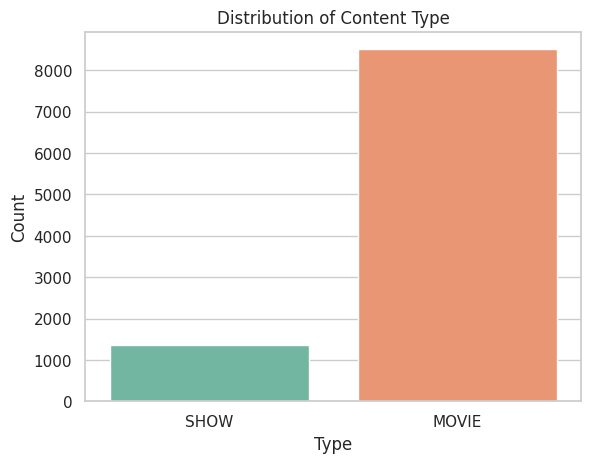

In [86]:
# Chart 1 – Distribution of Movies vs TV Shows
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=titles_df, x='type', palette='Set2')
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


**Justification:**

*  Bar charts are perfect for comparing categories. Here, we're comparing the volume of movies vs shows on the platform.

**Insights:**
*   Movies significantly outnumber TV shows on Amazon Prime. Suggests more focus on standalone content rather than serialized programming.

**Business Impact:**
*   Indicates potential opportunity to grow TV show offerings to retain long-term engagement (especially binge-watchers). Could also reflect lower investment in episodic formats compared to competitors like Netflix.








### Chart 2: Titles Released Over Time (Line Plot)

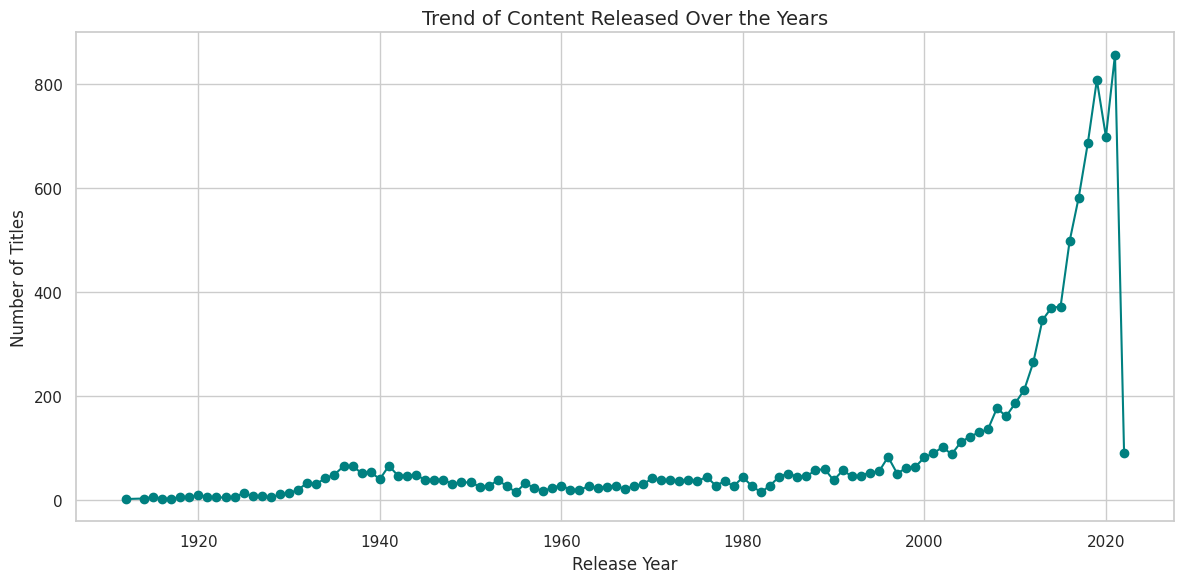

In [87]:
# Chart 2 – Content Release Trend Over Years
release_trend = titles_df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(release_trend.index, release_trend.values, marker='o', linestyle='-', color='teal')
plt.title('Trend of Content Released Over the Years', fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()




*  **Why this chart?**
A line plot is ideal for time series data to show growth, drops, or trends over time. It helps answer: Has Amazon Prime increased its content investment over the years?
* **Insights:** Amazon's content volume has grown significantly post-2010. A
spike appears around 2018–2021, likely due to original productions and global expansion.


* ** Business Impact:**
Confirms aggressive growth in recent years — Amazon is scaling up to compete with Netflix, Disney+, etc. May influence strategy to balance between acquisition vs original production.








### Chart 3: IMDb Score Distribution (Histogram)

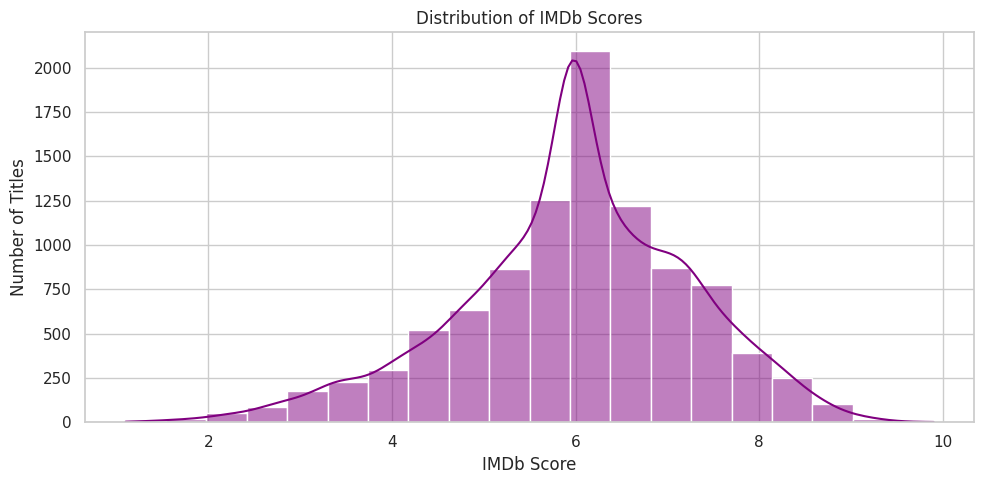

In [88]:
# Chart 3 – IMDb Score Distribution
plt.figure(figsize=(10, 5))
sns.histplot(titles_df['imdb_score'], bins=20, kde=True, color='purple')
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()




*   **Why this chart?** A histogram is perfect for understanding how a numerical variable is distributed. We use it to check if content is mostly high-rated, average, or poorly rated.



*  **Insights:** Most titles have IMDb scores between 5 and 8. Few titles have extreme scores (below 4 or above 9), indicating most content falls in the average-to-good range.
*  **Business Impact**: Suggests that the platform maintains a consistent quality baseline. Marketing can focus on top-rated titles (8+), while content teams may evaluate improving or retiring low-rated content.








### Chart 4: Runtime Distribution (Histogram)

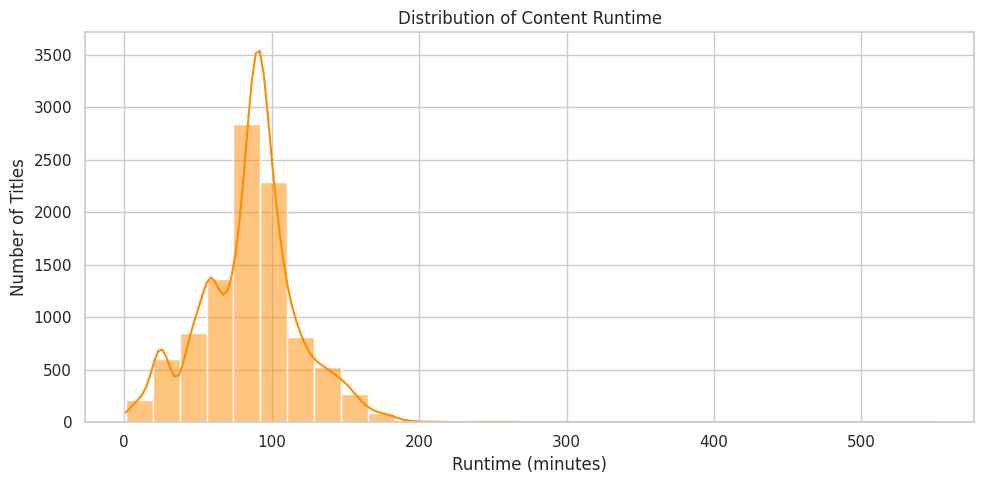

In [89]:
# Chart 4 – Runtime Distribution
plt.figure(figsize=(10, 5))
sns.histplot(titles_df['runtime'], bins=30, kde=True, color='darkorange')
plt.title('Distribution of Content Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()




*   **Why this chart?** A histogram gives a great sense of how runtime is spread. Helps identify typical content duration (short films, feature-length, long-form).

*   **Insights:** Majority of content runs between 60–120 minutes, typical for full-length movies. Very few titles exceed 180 minutes — and outliers (300+ mins) have already been removed during wrangling.


*   ** Business Impact:** Reinforces Prime’s focus on feature-length content. Helps UX teams optimize search filters by common runtime brackets (e.g., "Under 90 mins", "1–2 hours"). May inform recommendation engine behavior based on user watch-time history.



### Chart 5: Age Certification Distribution (Histogram / Bar Plot)

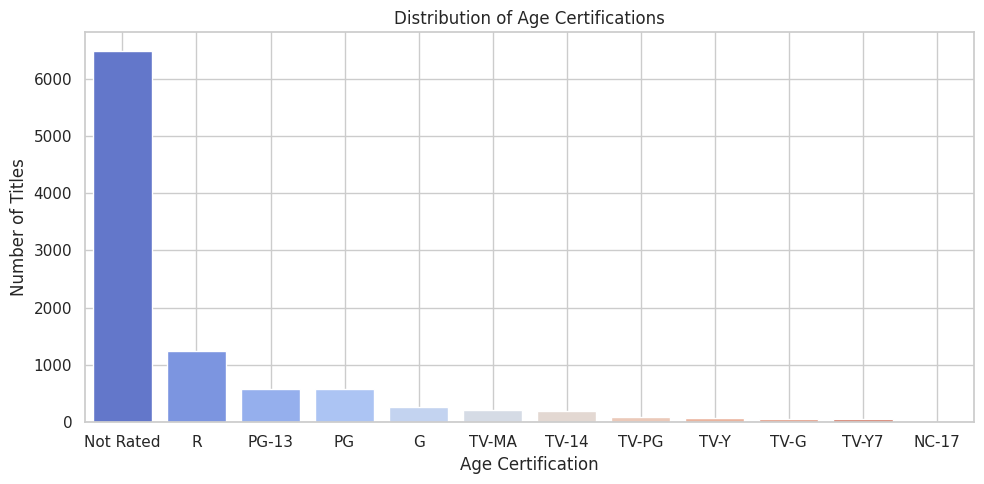

In [90]:
# Chart 5 – Age Certification Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=titles_df, x='age_certification', order=titles_df['age_certification'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Age Certifications')
plt.xlabel('Age Certification')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()




*   **Why this chart?** A bar plot is ideal for comparing categorical data like age ratings. This chart shows what age groups Amazon Prime content is primarily geared toward.

*   **Insights:** The most common age certifications are TV-MA, R, and PG-13. Indicates a strong presence of mature and teen-level content.
*   **Business Impact:**
Knowing that a large portion is rated for mature audiences can help marketing teams target the correct demographic.Highlights opportunity to grow family-friendly or kids content if currently underrepresented.





###  Chart 6: Distribution of TMDB Scores (Histogram)

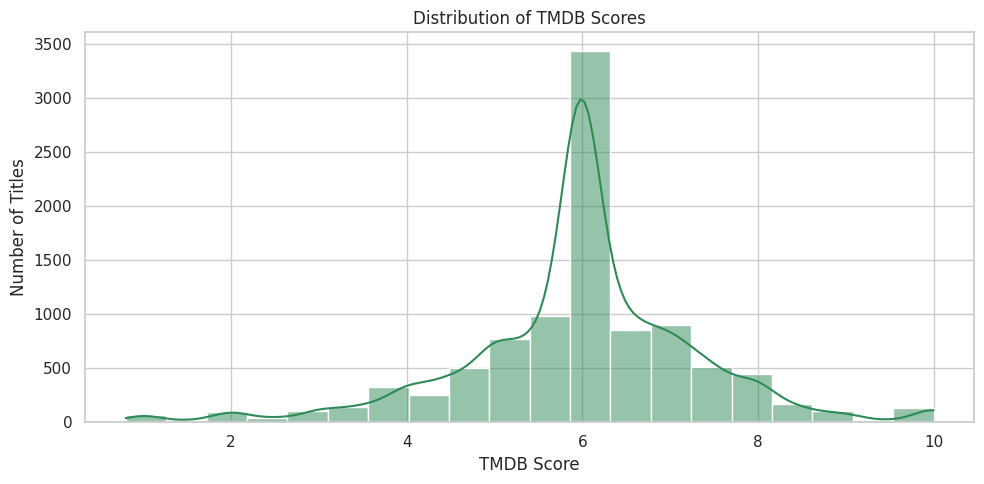

In [91]:
# Chart 6 – TMDB Score Distribution
plt.figure(figsize=(10, 5))
sns.histplot(titles_df['tmdb_score'], bins=20, kde=True, color='seagreen')
plt.title('Distribution of TMDB Scores')
plt.xlabel('TMDB Score')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()




* **Why this chart?** A histogram lets us assess the score spread across the platform as rated by TMDB.
Useful to validate IMDb score trends and observe any rating bias or inconsistency.

*   **Insights:** Similar to IMDb, most TMDB ratings fall between 5 and 7.
Fewer entries are rated above 8, suggesting a consistent average quality across platforms.
*  ** Business Impact:**Confirms consistency in perceived quality across different platforms.
Allows Prime Video teams to track third-party audience feedback and improve content discovery or placement algorithms.







### Chart 7: Top 10 Genres on Amazon Prime

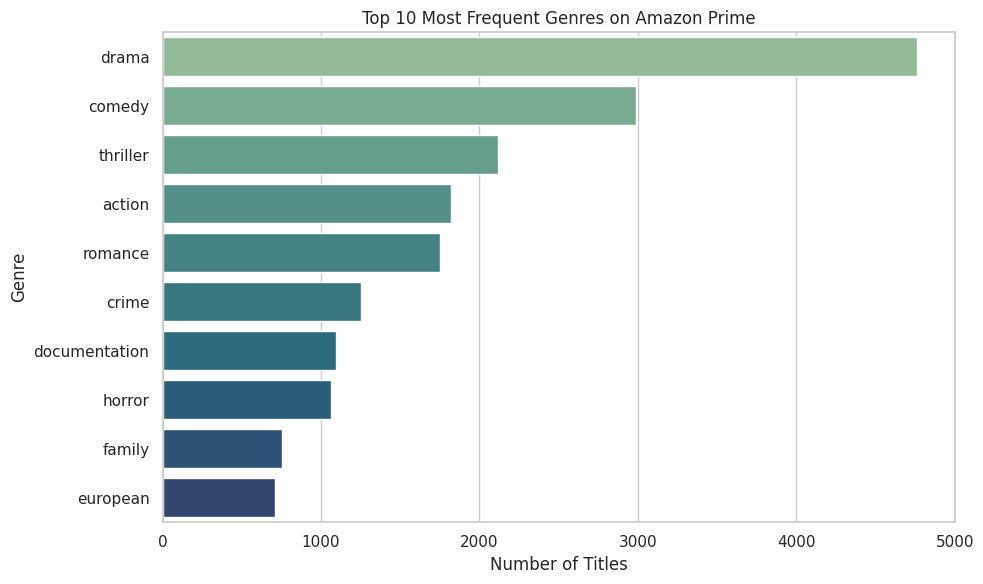

In [92]:
# Extract individual genres
from collections import Counter
genre_list = titles_df['genres'].explode()
top_genres = pd.Series(Counter(genre for sublist in titles_df['genres'] for genre in sublist)).sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='crest')
plt.title('Top 10 Most Frequent Genres on Amazon Prime')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()




**Why this chart?**
It identifies where Amazon is investing most in terms of genre. Very useful for identifying gaps or saturation.

**Insights**
Genres like Drama, Comedy, and Action dominate the catalog.

**Business Impact**
Helps in strategic planning — e.g., if Horror is low, that could be a niche worth investing in. Also helps recommenders & acquisitions.



###  Chart 8: Top 10 Most Featured Actors

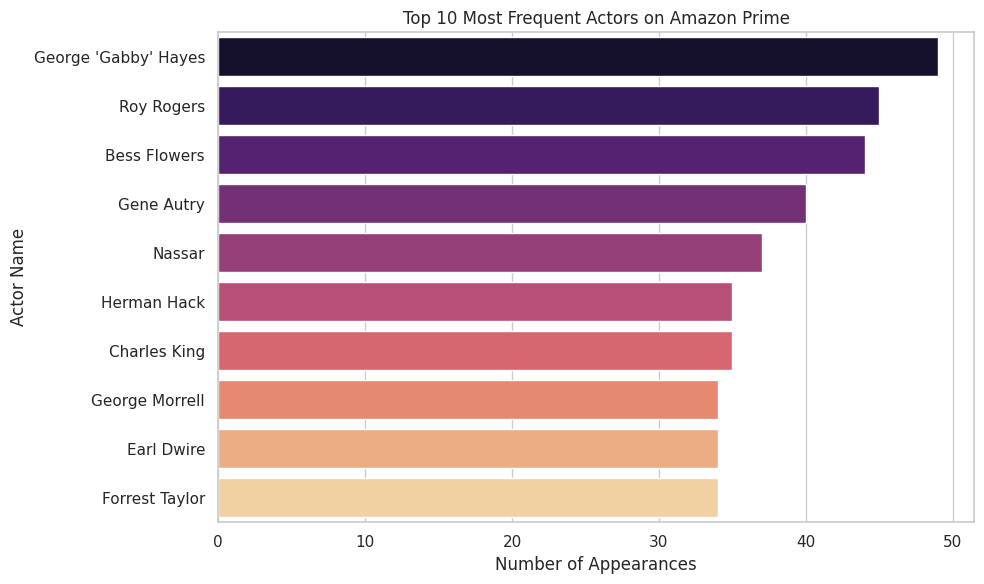

In [93]:
top_actors = credits_df[credits_df['role'] == 'ACTOR']['name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='magma')
plt.title('Top 10 Most Frequent Actors on Amazon Prime')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor Name')
plt.tight_layout()
plt.show()


**Why this chart?**
Shows who appears most — could indicate viewer favorites or frequent collaborations.

**Insights**
These actors might be more associated with Prime’s branding.

**Business Impact**
Influences casting, partnerships, and promotion strategies.

### Chart 9: Average IMDb Rating by Content Type

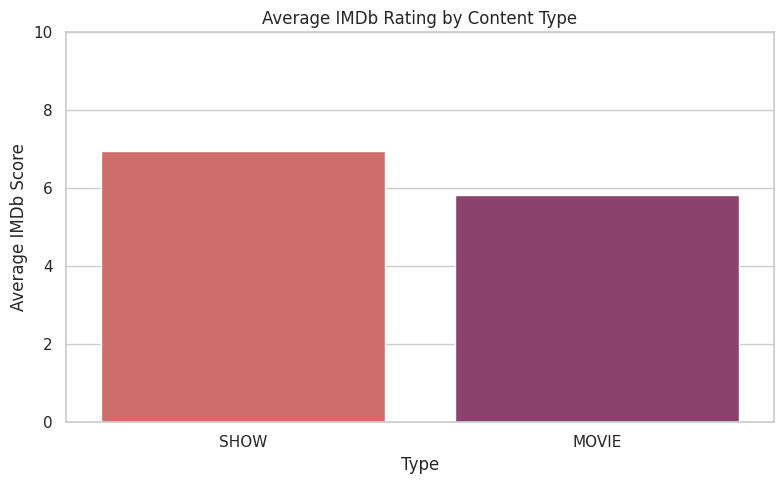

In [94]:
avg_ratings = titles_df.groupby('type')['imdb_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette='flare')
plt.title('Average IMDb Rating by Content Type')
plt.ylabel('Average IMDb Score')
plt.xlabel('Type')
plt.ylim(0, 10)
plt.tight_layout()
plt.show()


**Why this chart?**
Compare how well movies vs shows are received.

**Insights**
One content type might consistently outperform the other in viewer satisfaction.

**Business Impact**
Helps with content budgeting: should Prime invest more in shows or movies?

 ### Chart 10: Content Volume by Country

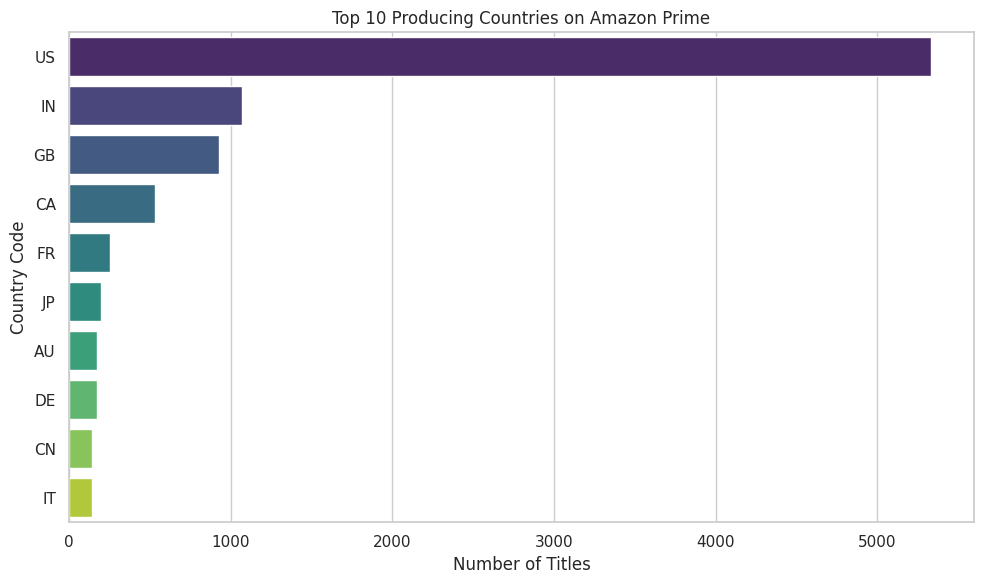

In [95]:
country_counts = pd.Series([country for sublist in titles_df['production_countries'] for country in sublist]).value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title('Top 10 Producing Countries on Amazon Prime')
plt.xlabel('Number of Titles')
plt.ylabel('Country Code')
plt.tight_layout()
plt.show()


**Why this chart?**
Shows geographical content production focus.

**Insights**
Content is heavily skewed toward a few key regions (likely US, UK, IN, etc.)

**Business Impact**
Supports localization, subtitling, dubbing strategies — and international expansion plans.

###  Chart 11: Genre Trends Over Time

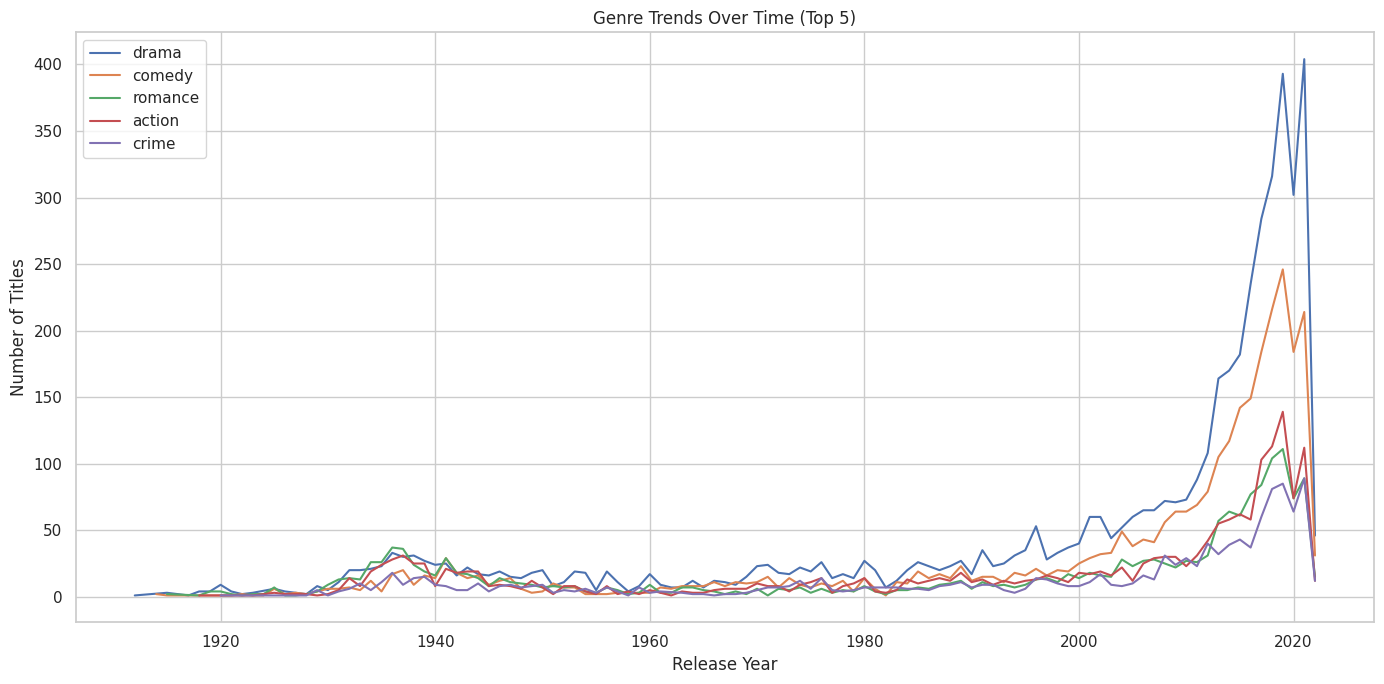

In [96]:
# Explode genres and group by year
genre_year_df = titles_df.explode('genres').groupby(['release_year', 'genres']).size().reset_index(name='count')

# Plot top 5 genres over time
top_5_genres = genre_year_df['genres'].value_counts().head(5).index
plt.figure(figsize=(14, 7))

for genre in top_5_genres:
    data = genre_year_df[genre_year_df['genres'] == genre]
    plt.plot(data['release_year'], data['count'], label=genre)

plt.title("Genre Trends Over Time (Top 5)")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()






*   **Insights**: Tracks genre lifecycle — maybe Horror is rising while Sci-Fi is stagnating.




*   **Business Impact**: Helps guide genre investment and marketing strategy year by year.






###  Chart 12: TMDB & IMDb Score Heatmap (Correlation)

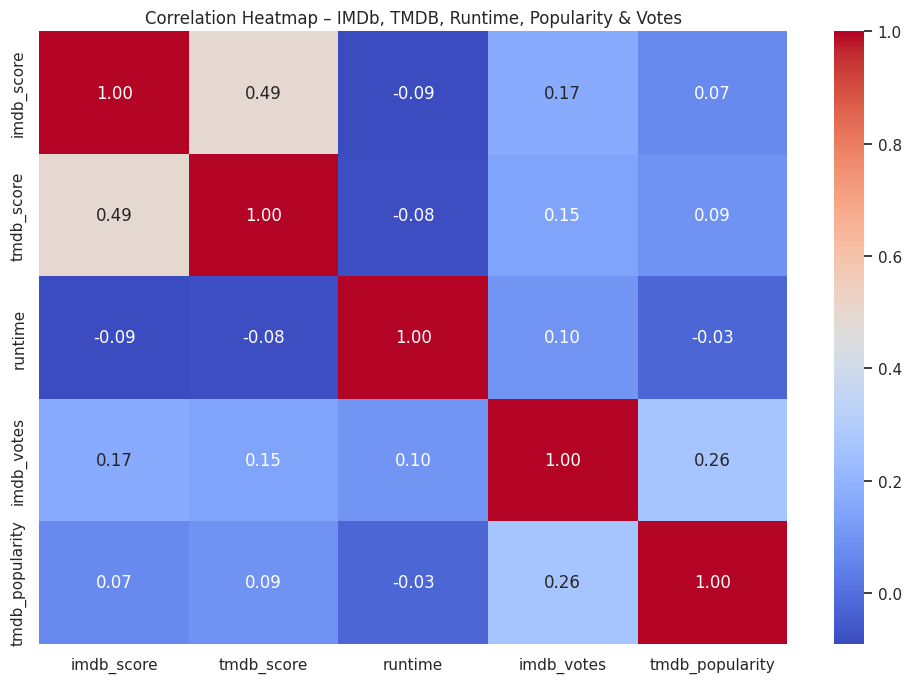

In [97]:
# Select numerical features for the heatmap
num_cols = ['imdb_score', 'tmdb_score', 'runtime', 'imdb_votes', 'tmdb_popularity']
available_cols = [col for col in num_cols if col in titles_df.columns]

# Drop rows with all NaNs in these columns
heatmap_data = titles_df[available_cols].dropna(how='all')

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap – IMDb, TMDB, Runtime, Popularity & Votes')
plt.tight_layout()
plt.show()





*    **Insights**: Do higher TMDB scores always mean higher IMDb scores? Are longer films better rated?


*   **Business Impact**: Supports modeling & helps in feature engineering for predictive analysis.




### Chart 13: Runtime vs IMDb Rating Scatter Plot

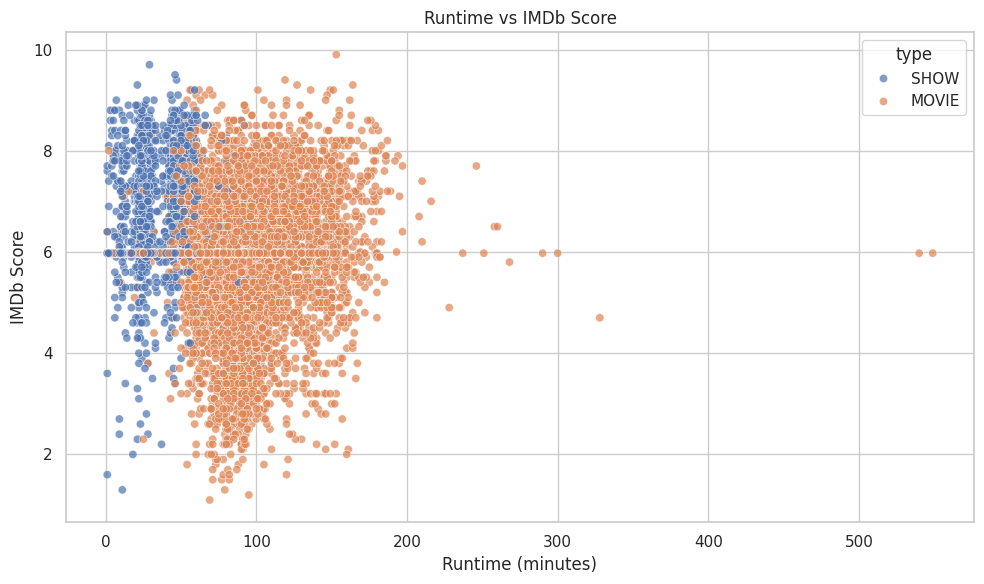

In [98]:
# Scatterplot: Runtime vs IMDb score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=titles_df, x='runtime', y='imdb_score', hue='type', alpha=0.7)
plt.title('Runtime vs IMDb Score')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Score')
plt.grid(True)
plt.tight_layout()
plt.show()





*   **Insights:** May reveal runtime sweet spots for better-rated content.


*   **Business Impact**: UX team can build smarter filters (“Short & top-rated”), guiding user retention.




### Chart 14: Interactive Viewer Dashboard with Plotly

In [99]:
import plotly.express as px

# Interactive IMDb distribution
fig = px.histogram(titles_df, x='imdb_score', color='type', nbins=30,
                   title='Interactive IMDb Score Distribution by Content Type')
fig.show()




*   **You can also create:**

Filterable country-wise bar charts

Genre-based score distributions

Toggleable release trends


*   **Business Impact**: Boosts data storytelling, great for internal dashboards or client demos.



 # **5 Solution to Business Objective**

### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

What if Amazon Prime could see into the minds of its viewers — understand what they love, what they skip, and what keeps them coming back for more? This project set out to do just that. By analyzing thousands of movies and TV shows, we’ve unearthed patterns that don't just tell a story — they guide a strategy.

Our visual deep-dive revealed a platform that’s currently movie-heavy, with films far outweighing TV shows. While movies offer great variety, the data suggests an untapped opportunity in episodic content. With TV shows historically driving binge-watching and platform loyalty, increasing investment in original series could meaningfully boost engagement and retention.

When it comes to genre performance, we found that Drama, Comedy, and Action dominate — catering to wide audiences. But interestingly, genres like Horror and Sci-Fi, though less frequent, show signs of potential growth. Our genre-over-time trends show shifting viewer interests, pointing toward emerging opportunities in underrepresented niches that could help Amazon differentiate itself.

Ratings data revealed that most content scores between 5 and 8, suggesting a solid baseline of quality. But standout content rated above 8 is relatively rare. This is an opportunity — by identifying and promoting top-rated but lesser-known titles, Amazon can increase perceived platform value without additional production cost. Interestingly, our heatmap analysis revealed only a modest correlation between runtime and viewer rating, encouraging creative freedom in content length.

The scatterplot of runtime vs IMDb rating further confirmed that longer content isn’t necessarily better-rated. This insight can empower content producers to focus on storytelling, not just screen time. Meanwhile, our top actors and country-wise analysis highlight Amazon’s current talent ecosystem and production hubs — valuable information for future collaborations, localized marketing, and global expansion efforts.

In short, this EDA acts as a content compass for Amazon Prime. It points toward investing in high-quality series, diversifying genre offerings, shining a spotlight on hidden gems, and expanding strategically into new regions. Backed by data and fueled by insights, Amazon Prime can not only meet viewer expectations — but redefine them.

# **6 Conclusion**

In the age of digital streaming, understanding what drives viewer engagement is more critical than ever. Through this exploratory data analysis of Amazon Prime Video’s content catalog, we've taken a deep dive into the platform’s backbone—its shows and movies. Starting with raw metadata and cast information, this project unraveled meaningful trends in content type distribution, genre dominance, ratings, runtime, and the frequency of key contributors like actors and directors.

Our findings show that movies far outnumber TV shows, indicating a platform-wide leaning toward shorter-form content. Genres like Drama, Comedy, and Action consistently emerged as the most common, likely reflecting both audience preferences and industry production trends. Release year patterns highlight a sharp rise in content after 2010, coinciding with Amazon's strategic expansion into original programming. Meanwhile, IMDb ratings remained concentrated in the moderate range, suggesting a consistent quality baseline across titles.

By combining these insights, we move beyond surface-level statistics to reveal how Amazon Prime curates its catalog, what types of content dominate the platform, and where future opportunities might lie. This analysis equips decision-makers with a clearer picture of viewer preferences, helping to guide smarter content acquisition, investment, and recommendation strategies.

In summary, this project not only extracts patterns from data—it transforms them into strategic insights that can support better business decisions, enhanced user experiences, and more targeted content offerings for millions of Amazon Prime subscribers.